<a href="https://colab.research.google.com/github/kportella/Challenge-Alura-Data-Science-Alura-Voz/blob/main/Challenge_Data_Science_Alura_Alura_Voz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Data Science Alura - Alura Voz
## Author: Kauê Alã Portella
## Email: portellakaue@gmail.com
## Linkedin: www.linkedin.com/in/kaueportella
## Github: https://github.com/kportella

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [93]:
pd.set_option("display.max_columns",100)

# Primeira Semana

## Tratamento de Dados


### Importando Json

In [94]:
data_churn = pd.read_json('/content/sample_data/Telco-Customer-Churn.json')
data_churn

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


As váriaveis customer, phone, internet e account estão em formato JSON, sendo necessário a transformação deles para tabelas.

### Transformando dados em Json para uma tabela

In [95]:
customer_data = pd.json_normalize(data = data_churn.customer, sep='_',max_level = 1)
customer_data

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [96]:
phone_data = pd.json_normalize(data = data_churn.phone, sep='_',max_level = 1)
phone_data

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [97]:
internet_data = pd.json_normalize(data = data_churn.internet, sep='_',max_level = 1)
internet_data

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [98]:
account_data = pd.json_normalize(data = data_churn.account, sep='_', max_level = 1)
account_data

,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [99]:
data_churn = pd.concat([data_churn,customer_data,phone_data,internet_data,account_data], axis = 1)
data_churn

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [100]:
data_churn.drop(['customer','phone','internet','account'], axis=1, inplace=True)
data_churn

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Transformado o JSON para tabelas utilizando json_normalize e concatenando com a tabela principal, depois excluindo as colunas onde estavam esses arquivos JSON.

### Analisando dados

#### Verificando colunas e informações gerais do dataframe

In [101]:
data_churn.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

In [102]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Verificando as colunas pelo info(), é possível perceber que não há nenhuma váriavel nula, além disso, há alguns problemas em relação a padronização dos nomes das colunas, com nome iniciando em letra minúscula (e.g, gender) e palavras separadas com _ como Charges_Monthly, além de uma possível tipagem errada em Charges_Total

#### Analisando individualmente as colunas

##### Coluna CustomerID

In [103]:
data_churn.customerID.unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [104]:
data_churn.rename(columns = {'customerID':'CustomerID'},inplace=True)

In [105]:
data_churn.CustomerID.unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

##### Coluna Churn

In [106]:
data_churn.Churn.unique()

array(['No', 'Yes', ''], dtype=object)

In [107]:
data_churn.Churn.replace('','No info', inplace = True)

In [108]:
data_churn.Churn.unique()

array(['No', 'Yes', 'No info'], dtype=object)

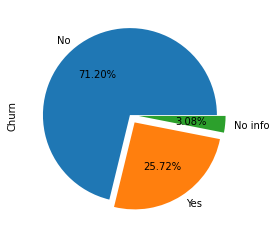

In [109]:
data_churn.Churn.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1,0.1))

Analisando o gráfico de Churn, podemos ver que mais de 2/3 dos clientes não saiu da empresa, além disso, termos em torno de 3% de usuários sem informações.

##### Coluna Gender

In [110]:
data_churn.gender.unique()

array(['Female', 'Male'], dtype=object)

In [111]:
data_churn.rename(columns = {'gender':'Gender'},inplace=True)

In [112]:
data_churn.Gender.unique()

array(['Female', 'Male'], dtype=object)

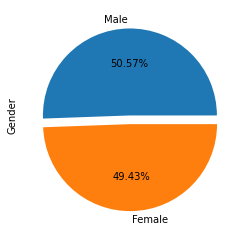

In [113]:
data_churn.Gender.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1,))

Em relação a gênero, está bem equilibrado, com uma levissima tendencia para o gênero masculino.

##### Coluna SeniorCitizen

In [114]:
data_churn.SeniorCitizen.unique()

array([0, 1])

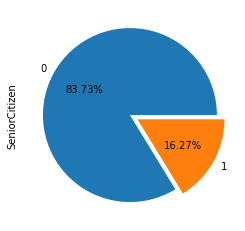

In [115]:
data_churn.SeniorCitizen.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1,))

Sobre se o cliente é idoso ou não, a maioria, 83.73%, não é idosa.

##### Coluna Partner

In [116]:
data_churn.Partner.unique()

array(['Yes', 'No'], dtype=object)

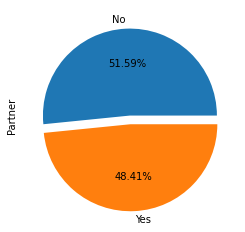

In [117]:
data_churn.Partner.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1,))

Sobre o cliente possuir um parceirx, há maioria para clientes sem. 

##### Coluna Dependents

In [118]:
data_churn.Dependents.unique()

array(['Yes', 'No'], dtype=object)

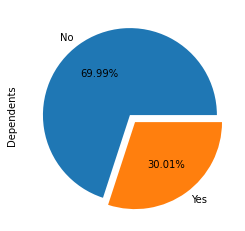

In [119]:
data_churn.Dependents.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1,))

Existe uma maioria de pessoas que não possuem dependentes.

##### Coluna Tenure

In [120]:
data_churn.tenure.unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [121]:
data_churn.rename(columns = {'tenure':'Tenure'},inplace=True)

In [122]:
data_churn.Tenure.unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

Text(0.5, 0, 'Duração de Contrato (meses)')

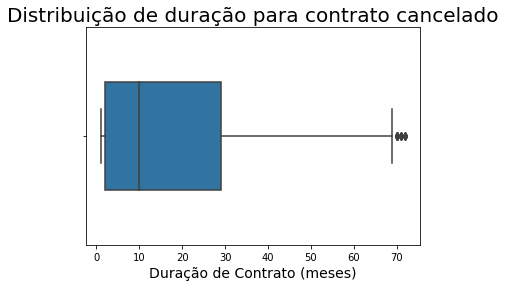

In [123]:
ax = sns.boxplot(x = data_churn[data_churn.Churn == 'Yes'].Tenure, orient = 'h', width = 0.5)
ax.axes.set_title('Distribuição de duração para contrato cancelado', fontsize = 20)
ax.set_xlabel('Duração de Contrato (meses)', fontsize = 14)

Em relação aos duração de contratos cancelados, podemos ver que a maior parte dos contratos cancelados dura entre 0 a 30 meses, sendo que a mediana dos valores é de em torno de 10 meses, possuimos alguns outliers para contratos cancelados, com eles sendo cancelados depois de 70 meses.

Text(0.5, 0, 'Duração de Contrato (meses)')

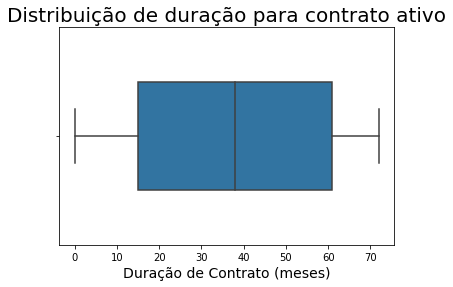

In [124]:
ax = sns.boxplot(x = data_churn[data_churn.Churn == 'No'].Tenure, orient = 'h', width = 0.5)
ax.axes.set_title('Distribuição de duração para contrato ativo', fontsize = 20)
ax.set_xlabel('Duração de Contrato (meses)', fontsize = 14)

Sobre contratos ativos, o nosso intervalo interquartílico é grande, cobrindo de 20 a 60 meses, com uma mediana um pouco menor de 40 meses.

Text(0, 0.5, 'Número de Clientes')

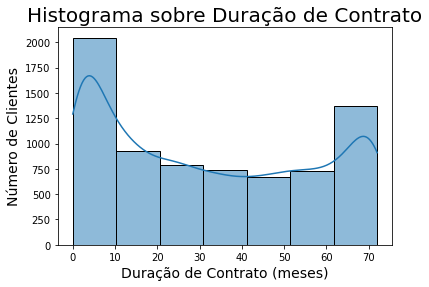

In [125]:
ax = sns.histplot(x = data_churn.Tenure, bins = 7, kde = True)
ax.axes.set_title('Histograma sobre Duração de Contrato', fontsize = 20)
ax.set_xlabel('Duração de Contrato (meses)', fontsize = 14)
ax.set_ylabel('Número de Clientes', fontsize = 14)

Podemos ver que a maioria dos clientes se encontra na duração de contrato de no máximo 10 meses, seguido pelos que tem de 60 a 70 meses.

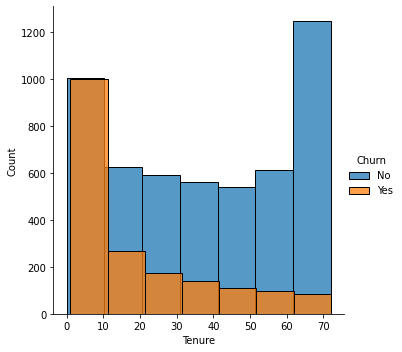

In [126]:
data_churn_YesOrNo = data_churn[(data_churn.Churn == 'No') | (data_churn.Churn == 'Yes')]

ax = sns.FacetGrid(data_churn_YesOrNo, hue="Churn",height=5)
ax.map_dataframe(sns.histplot,x = 'Tenure', bins = 7)
ax.add_legend()

Analisando a quantidade de meses contratados junto com o cancelamento do contrato, podemos ver que o número de contratos cancelados é quase o mesmo que o de contratos ativos nos primeiros 10 meses, mas o cancelamento por parte de usuários que possuem contratos por mais desse periodo, cai bastante.

##### Coluna PhoneService

In [127]:
data_churn.PhoneService.unique()

array(['Yes', 'No'], dtype=object)

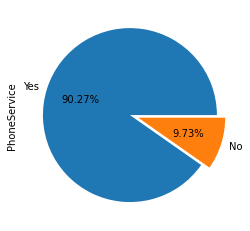

In [128]:
data_churn.PhoneService.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1,))

É visto que a grande maioria possui um serviço de telefone.

##### Coluna MultipleLines

In [129]:
data_churn.MultipleLines.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

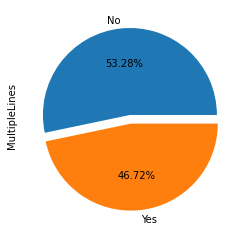

In [130]:
data_churn[(data_churn.MultipleLines == 'No') | (data_churn.MultipleLines == 'Yes')].MultipleLines.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1))

Retirando os dados dos que não possuem serviço de telefonia, é possível ver que mais da metade dos clientes não possuem linhas multiplas.

##### Coluna InternetService

In [131]:
data_churn.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

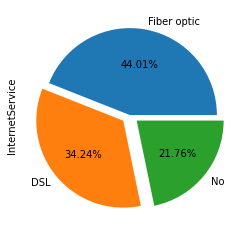

In [132]:
data_churn.InternetService.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1,0.1))

Nesse caso, nós temos a maior parte dos clientes possuindo fibra ótica, mas com um número considerável de clientes não possuindo nenhum serviço de internet.

##### Coluna OnlineSecurity

In [133]:
data_churn.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

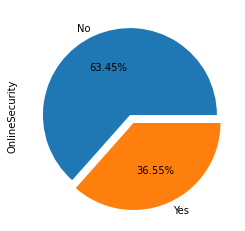

In [134]:
data_churn[(data_churn.OnlineSecurity == 'Yes') | (data_churn.OnlineSecurity == 'No')].OnlineSecurity.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1))

Segundo o gráfico, a maior parte dos usuários que possuem serviço de internet, não possuem o serviço de segurança online.

##### Coluna OnlineBackup

In [135]:
data_churn.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

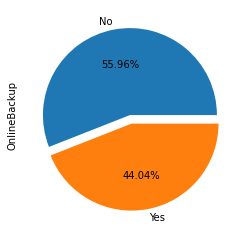

In [136]:
data_churn[(data_churn.OnlineBackup == 'Yes') | (data_churn.OnlineBackup == 'No')].OnlineBackup.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1))

Segundo o gráfico, a maior parte dos usuários que possuem serviço de internet, não possuem o serviço de backup online.



##### Coluna DeviceProtection

In [137]:
data_churn.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

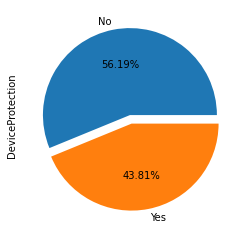

In [138]:
data_churn[(data_churn.DeviceProtection == 'Yes') | (data_churn.DeviceProtection == 'No')].DeviceProtection.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1))

Segundo o gráfico, a maior parte dos usuários que possuem serviço de internet, não possuem o serviço de proteção de devices.

##### Coluna TechSupport

In [139]:
data_churn.TechSupport.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

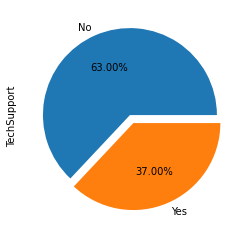

In [140]:
data_churn[(data_churn.TechSupport == 'Yes') | (data_churn.TechSupport == 'No')].TechSupport.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1))

Segundo o gráfico, a maior parte dos usuários que possuem serviço de internet, não possuem o serviço de suporte técnico.


##### Coluna StreamingTV

In [141]:
data_churn.StreamingTV.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

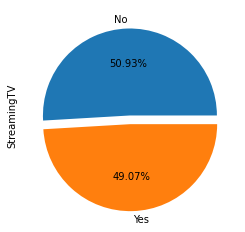

In [142]:
data_churn[(data_churn.StreamingTV == 'Yes') | (data_churn.StreamingTV == 'No')].StreamingTV.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1))

Segundo o gráfico, a maior parte dos usuários que possuem serviço de internet, não possuem o serviço de TV a cabo, mas há pouca diferença.

##### Coluna StreamingMovies

In [143]:
data_churn.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

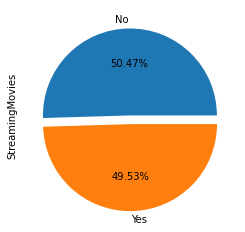

In [144]:
data_churn[(data_churn.StreamingMovies == 'Yes') | (data_churn.StreamingMovies == 'No')].StreamingMovies.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1))

Segundo o gráfico, a maior parte dos usuários que possuem serviço de internet, não possuem o streaming de filmes, mas há pouca diferença.

##### Coluna Contract

In [145]:
data_churn.Contract.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

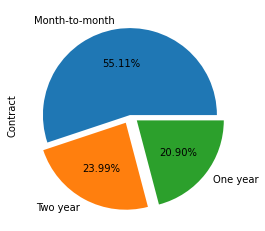

In [146]:
data_churn.Contract.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1,0.1))

Podemos ver que a maioria paga o serviço mensalmente, enquanto que a outra parte se divide entre planos anuais e de dois anos.

##### Coluna PaperlessBilling

In [147]:
data_churn.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

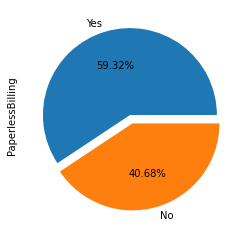

In [148]:
data_churn.PaperlessBilling.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1))

Podemos ver que quase 3/5 dos clientes paga online, enquanto a outra parte, não.

##### Coluna PaymentMethod

In [149]:
data_churn.PaymentMethod.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

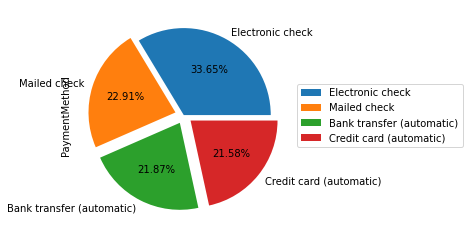

In [150]:
data_churn.PaymentMethod.value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0,0.1,0.1,0.1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

##### Coluna ChargesMonthly

In [151]:
data_churn.Charges_Monthly.unique()  

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [152]:
data_churn.rename(columns = {'Charges_Monthly':'ChargesMonthly'},inplace=True)

In [153]:
data_churn.ChargesMonthly.unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

Text(0.5, 0, 'Cobrança mensal')

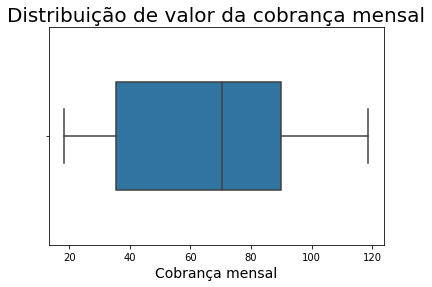

In [154]:
ax = sns.boxplot(x = data_churn.ChargesMonthly, orient = 'h', width = 0.5)
ax.axes.set_title('Distribuição de valor da cobrança mensal', fontsize = 20)
ax.set_xlabel('Cobrança mensal', fontsize = 14)

##### Coluna ChargesTotal

In [155]:
data_churn.Charges_Total.unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [156]:
data_churn.rename(columns = {'Charges_Total':'ChargesTotal'},inplace=True)

In [157]:
data_churn.ChargesTotal.unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [158]:
data_churn.ChargesTotal = pd.to_numeric(data_churn.ChargesTotal, downcast="float")

ValueError: ignored

In [159]:
data_churn.ChargesTotal.replace(' ','0', inplace = True)

In [160]:
data_churn.ChargesTotal = data_churn.ChargesTotal.astype(np.float64)

In [161]:
data_churn.ChargesTotal.unique()

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

Text(0.5, 0, 'Cobrança anual')

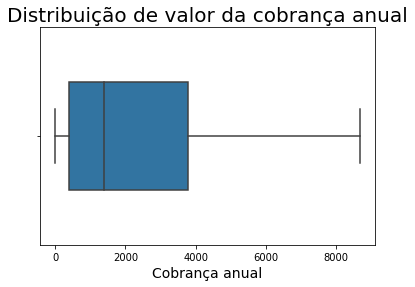

In [162]:
ax = sns.boxplot(x = data_churn.ChargesTotal, orient = 'h', width = 0.5)
ax.axes.set_title('Distribuição de valor da cobrança anual', fontsize = 20)
ax.set_xlabel('Cobrança anual', fontsize = 14)

Nessa etapa, foi necessário alterar o nome das colunas que não estavam no padrão, além de tratar dados que estavam adicionados de forma errada, como na coluna Churn, onde foi feito um replace dos dados que estavam vazios para o nome 'No Info'. Foi notado também que na tabela ChargesTotal, existia dados com o valor ' ', foi feito o replace para o valor zero, pois essa informação mostrava que ainda não tinha sido pago nenhum tipo de valor à empresa.

Em relação ao tipo de dados, foi feito a divisão da seguinte maneira:
  * Quantitativa:
    * Discreta:
      1. Tenure
    * Contínua:
      1. ChargesTotal
      2. ChargesMonthly
  * Qualitativa
    * Nominal:
      1. CustomerID
      2. Churn
      3. Gender
      4. SeniorCitizen
      5. Partner
      6. Dependents
      7. PhoneService
      8. InternetService
      9. OnlineSecurity
      10. OnlineBackup
      11. DeviceProtection
      12. TechSupport
      13. StreamingTV
      14. StreamingMovies
      15. Contract
      16. PaperlessBilling
      17. PaymentMethod

### Extras Primeira Semana


#### Coluna de gasto diário

In [163]:
chargesDaily = round(data_churn.ChargesMonthly / 30,2)
chargesDaily

0       2.19
1       2.00
2       2.46
3       3.27
4       2.80
        ... 
7262    1.84
7263    2.84
7264    1.68
7265    2.26
7266    1.97
Name: ChargesMonthly, Length: 7267, dtype: float64

In [164]:
data_churn.insert(18,"ChargesDaily",chargesDaily)

Text(0.5, 0, 'Cobrança diária')

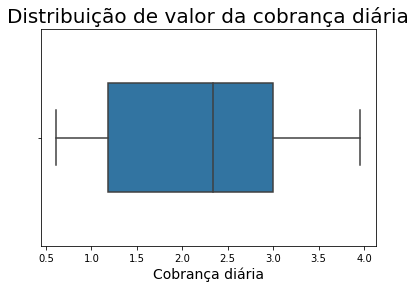

In [165]:
ax = sns.boxplot(x = data_churn.ChargesDaily, orient = 'h', width = 0.5)
ax.axes.set_title('Distribuição de valor da cobrança diária', fontsize = 20)
ax.set_xlabel('Cobrança diária', fontsize = 14)

In [166]:
data_churn

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,ChargesDaily,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,2.19,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,2.00,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,2.46,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,3.27,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,2.80,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,1.84,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,2.84,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,1.68,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,2.26,Mailed check,67.85,4627.65


#### Tradução das Colunas

In [167]:
colunas_traduzidas = {
    'CustomerID':'ClienteID',
    'Churn':'SaidaCliente',
    'Gender':'Sexo',
    'SeniorCitizen':'Idoso',
    'Partner': 'Parceirx',
    'Dependents': 'Dependentes',
    'Tenure': 'MesesContrato',
    'PhoneService': 'AssinaturaTelefone',
    'MultipleLines': 'MuitasAssinaturasTelefone',
    'InternetService': 'ServicoInternet',
    'OnlineSecurity': 'SegurancaOnline',
    'OnlineBackup': 'BackupAdicional',
    'DeviceProtection': 'ProtecaoDispositivo',
    'TechSupport': 'SuporteTecnico',
    'StreamingTV': 'TVACabo',
    'StreamingMovies': 'ServicoStreaming',
    'Contract': 'Contrato',
    'PaperlessBilling': 'PagamentoOnline',
    'PaymentMethod': 'FormaPagamento',
    'ChargesMonthly': 'CobrancaMensal',
    'ChargesTotal': 'CobrancaTotal',
    'ChargesDaily': 'CobrancaDiaria'
}

In [168]:
data_churn_traduzido = data_churn.rename(columns=colunas_traduzidas)

In [169]:
data_churn_traduzido

,ClienteID,SaidaCliente,Sexo,Idoso,Parceirx,Dependentes,MesesContrato,AssinaturaTelefone,MuitasAssinaturasTelefone,ServicoInternet,SegurancaOnline,BackupAdicional,ProtecaoDispositivo,SuporteTecnico,TVACabo,ServicoStreaming,Contrato,PagamentoOnline,CobrancaDiaria,FormaPagamento,CobrancaMensal,CobrancaTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,2.19,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,2.00,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,2.46,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,3.27,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,2.80,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,1.84,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,2.84,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,1.68,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,2.26,Mailed check,67.85,4627.65


### Estado da tabela da primeira semana

In [170]:
data_churn

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,ChargesDaily,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,2.19,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,2.00,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,2.46,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,3.27,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,2.80,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,1.84,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,2.84,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,1.68,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,2.26,Mailed check,67.85,4627.65


### Resumo
  Em resumo:
  * Feita a tradução das colunas do nosso dataset;
  * Dados com problemas foram tratados;
  * Coluna ChargesTotal convertida de string pra float64;
  * Campo ChargesDaily adicionados

  No final, o Dataset possui 22 colunas com 7267 linhas.